In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read dataset
file_path = "E:/Uni/Thesis/Material/Dataset/archive/world_development_data_imputed.csv"
data = pd.read_csv(file_path, sep=',')

# Explore the data
print(data.head(5))
print(data.isna().sum())

     Year           Country   Region           SubRegion  SurfAreaSqKm  \
0  2000.0       Afghanistan     Asia       Southern Asia      652860.0   
1  2000.0             Malta   Europe     Southern Europe         320.0   
2  2000.0           Belgium   Europe      Western Europe       30530.0   
3  2000.0  Marshall Islands  Oceania          Micronesia         180.0   
4  2000.0        Mauritania   Africa  Sub-Saharan Africa     1030700.0   

     PopTotal      PopDens  PopGrowth%           GDP  GDPGrowth%  ...  \
0  19542982.0    29.963329    1.443803  1.801248e+10   -5.206288  ...   
1    390087.0  1219.021875    0.645267  4.323339e+09   19.681791  ...   
2  10251250.0   338.548547    0.242518  2.367925e+11    3.716679  ...   
3     54224.0   301.244444    0.721838  1.153475e+08    1.354079  ...   
4   2695003.0     2.614731    2.799182  1.779521e+09   -3.918026  ...   

       GNIAtlas  Imports%GDP  IndValAdd%GDP  InflConsPric%  LifeExpBirth  \
0  1.778669e+10    41.312634      17.178

In [3]:
# Preprocess data
africa_data = data[data['Region'] == 'Africa']
africa_data = africa_data.drop(columns=['Year', 'SurfAreaSqKm'])
africa_data = africa_data.select_dtypes(include=[np.number])

# Explore data
print(africa_data.head(5))
print(africa_data.isna().sum())


      PopTotal     PopDens  PopGrowth%           GDP  GDPGrowth%  \
4    2695003.0    2.614731    2.799182  1.779521e+09   -3.918026   
5    1186873.0  584.666502    0.982676  4.663321e+09    8.202792   
8   11239101.0    9.210943    2.907829  2.961485e+09   -0.060835   
12  28554415.0   63.980316    1.330563  4.301746e+10    2.582181   
13  17768505.0   22.595317    2.453306  5.656474e+09    1.180301   

    AdolFertRate  AgriValAdd%GDP  Exports%GDP  FertRate     FDINetBoP  ...  \
4         92.364       24.828745    25.517116     5.459  4.009600e+07  ...   
5         38.898        5.705010    61.094215     1.990  2.656412e+08  ...   
8        182.216       32.901868    22.478590     6.874  6.033162e+07  ...   
12        35.495       10.728632    24.196828     2.796  4.265533e+08  ...   
13       168.573       19.095205    11.196198     5.812  1.393000e+08  ...   

        GNIAtlas  Imports%GDP  IndValAdd%GDP  InflConsPric%  LifeExpBirth  \
4   1.907497e+09    33.423259      29.951850 

PopGrowth%         1.000000
UrbanPopGrowth%    0.808916
FertRate           0.718342
AdolFertRate       0.602206
MortRateU5         0.487373
AgriValAdd%GDP     0.375026
NetMigr            0.302050
GDPGrowth%         0.165506
PopTotal           0.110773
InflConsPric%      0.035820
IndValAdd%GDP      0.010282
FDINetBoP         -0.064019
GNIAtlas          -0.129017
GDP               -0.129196
PopDens           -0.211428
Exports%GDP       -0.231188
Imports%GDP       -0.241433
MerchTrade%GDP    -0.263154
LifeExpBirth      -0.301924
MobileSubs/100    -0.310243
GNI/CapAtlas      -0.375752
Name: PopGrowth%, dtype: float64


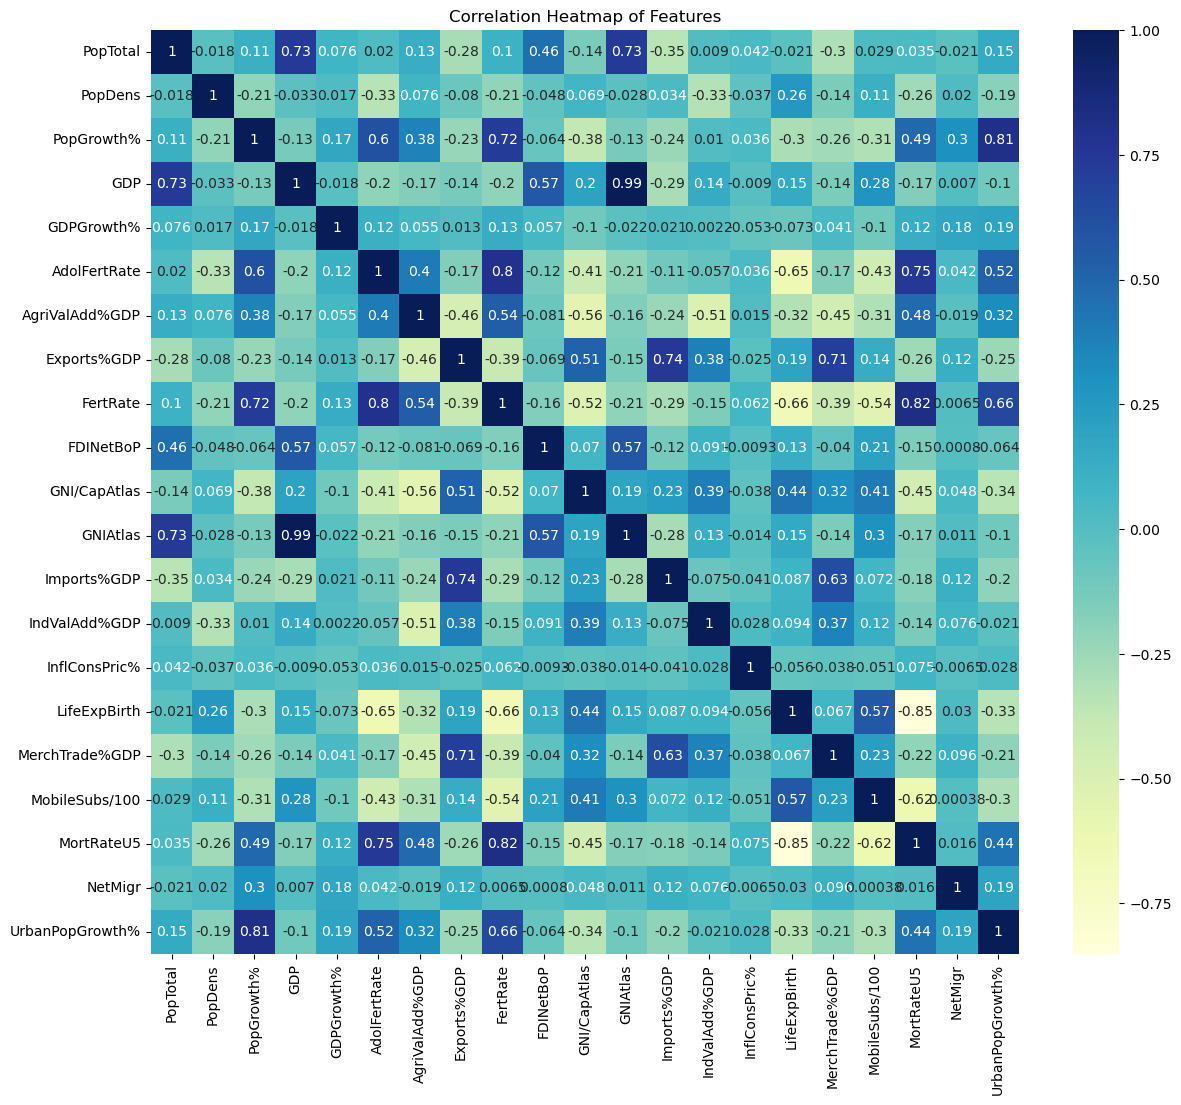

In [4]:
# Compute correlation matrix
africa_data_corr = africa_data.corr()
print(africa_data_corr['PopGrowth%'].sort_values(ascending=False))

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(africa_data_corr, cmap="YlGnBu", annot=True)
plt.title("Correlation Heatmap of Features")
plt.savefig("Featurs_Correlation.png", dpi=300, bbox_inches='tight')
plt.show()

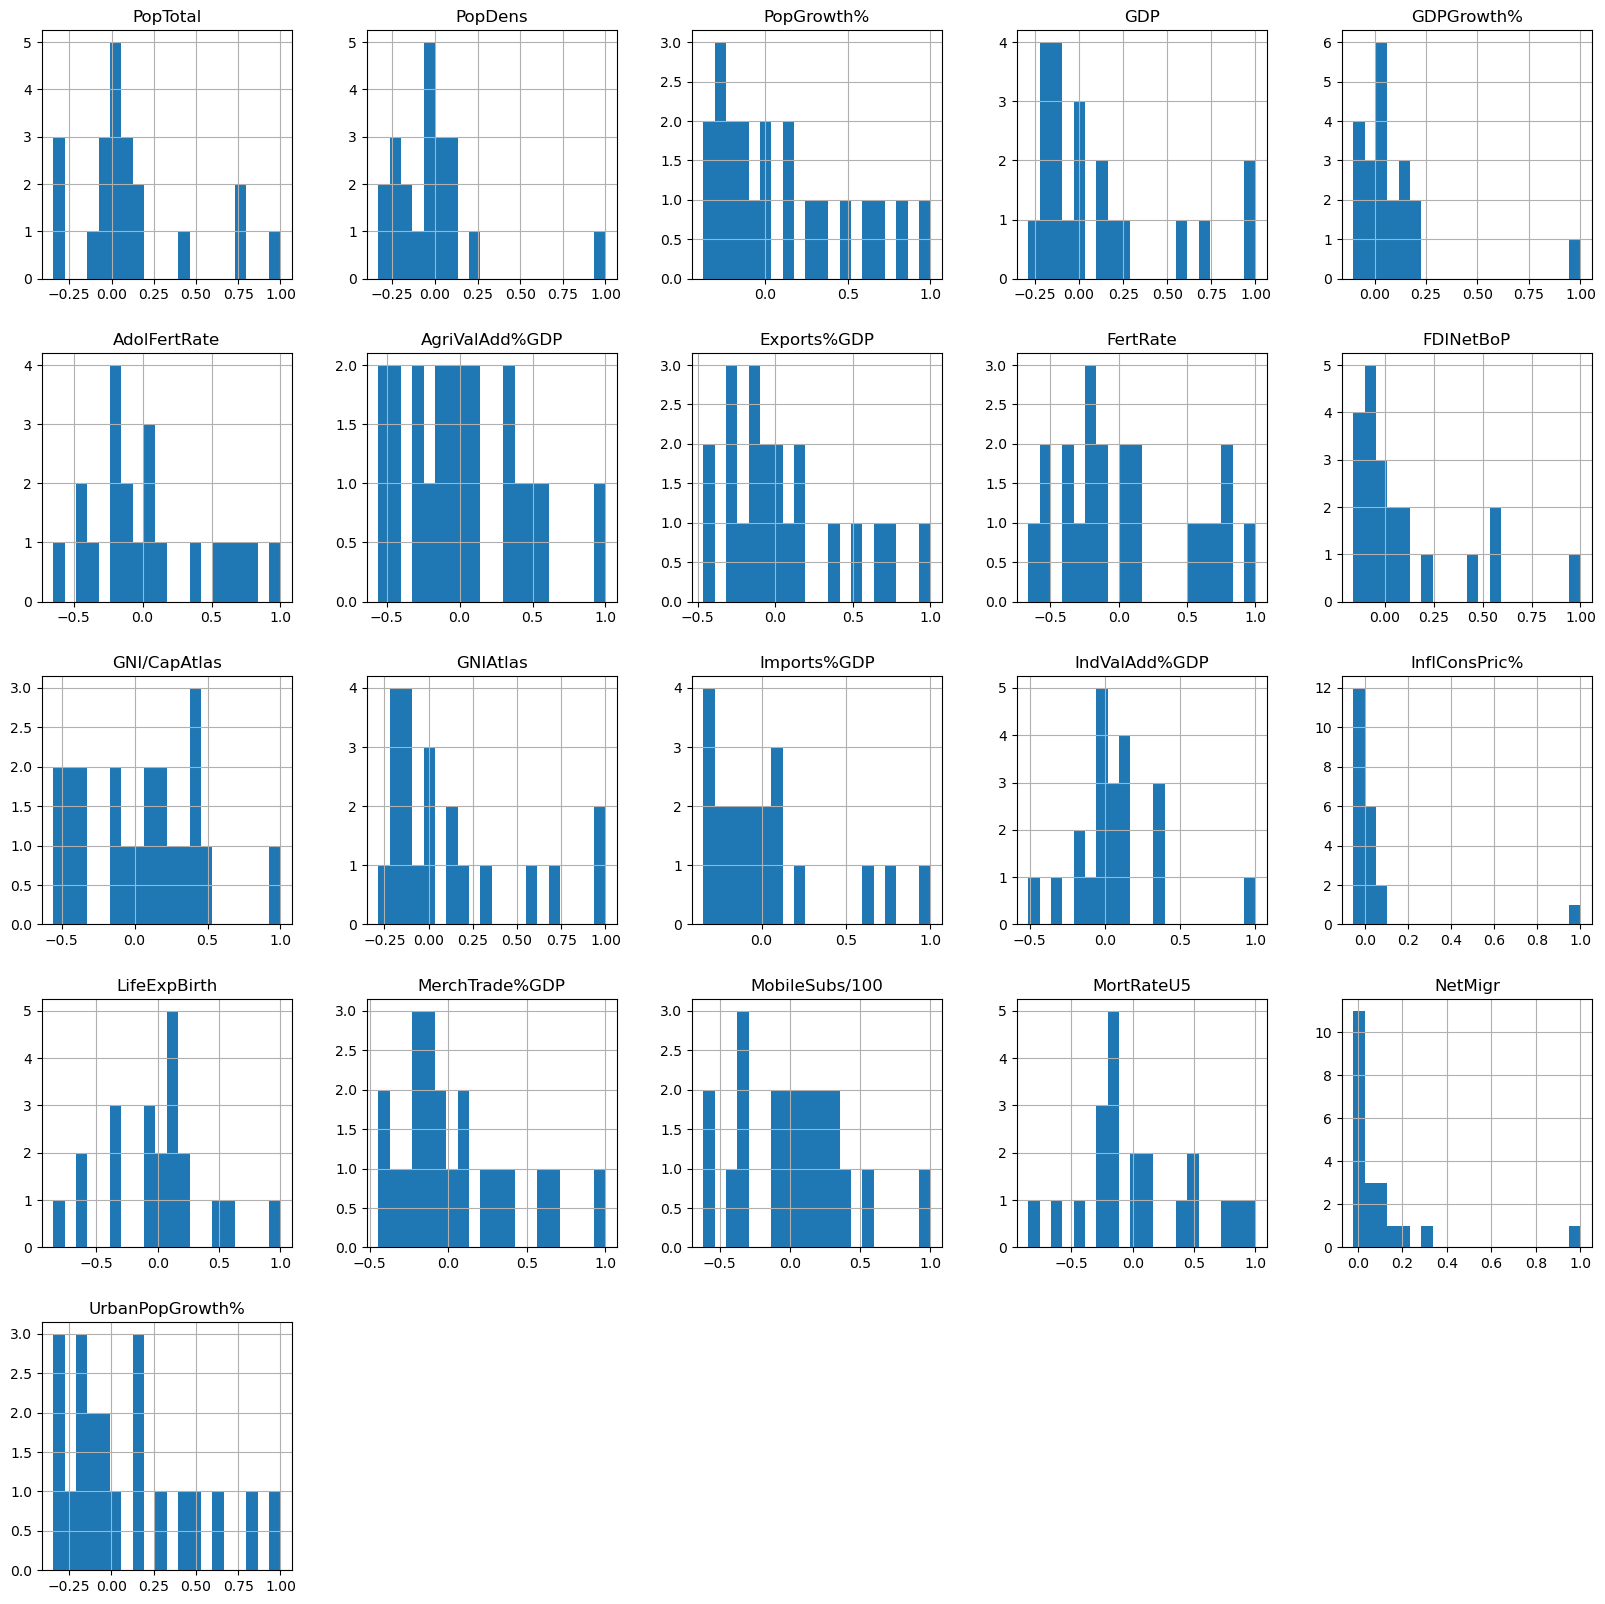

In [5]:
# Plot histograms
africa_data_corr.hist(figsize=(20, 20), bins=20)
plt.title("Features Histograms")
plt.savefig("Features_His.png")
plt.show()

C:\Users\nazno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


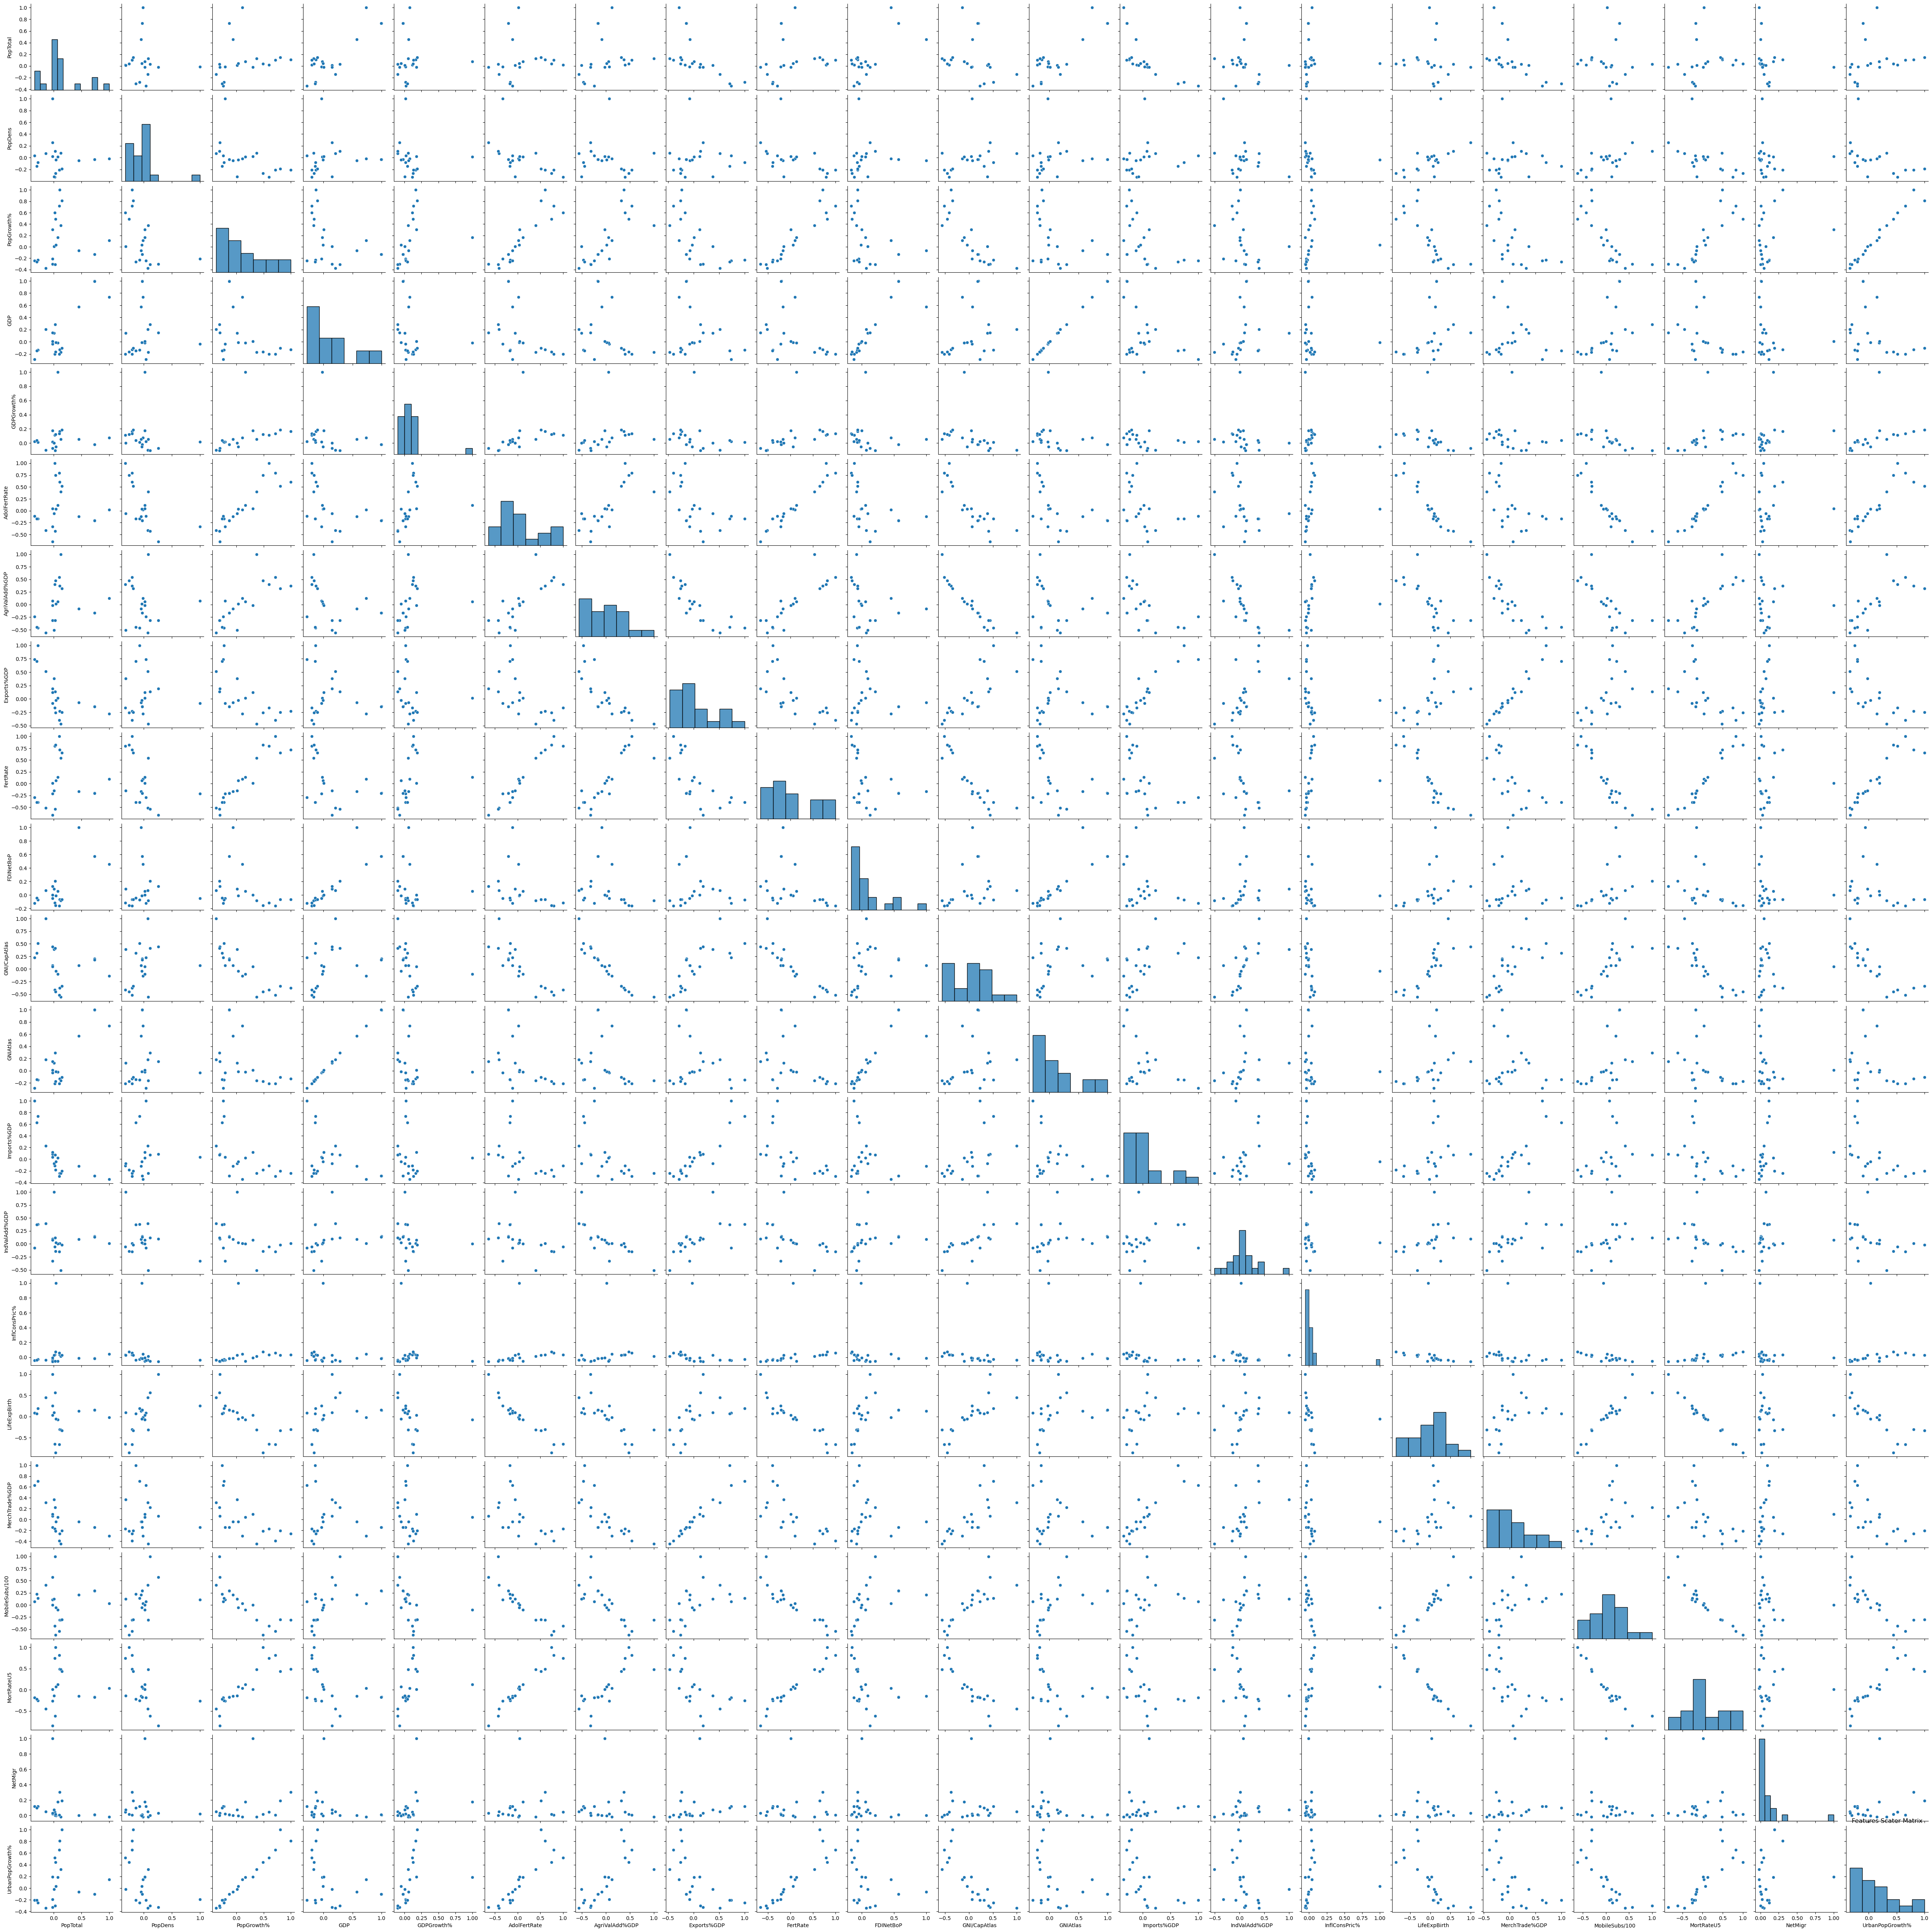

In [6]:
#Plot scatter matrix
sns.pairplot(africa_data_corr)
plt.title("Features Scater Matrix")
plt.savefig("Features_Scat.png", dpi = 300, bbox_inches = 'tight')
plt.show()

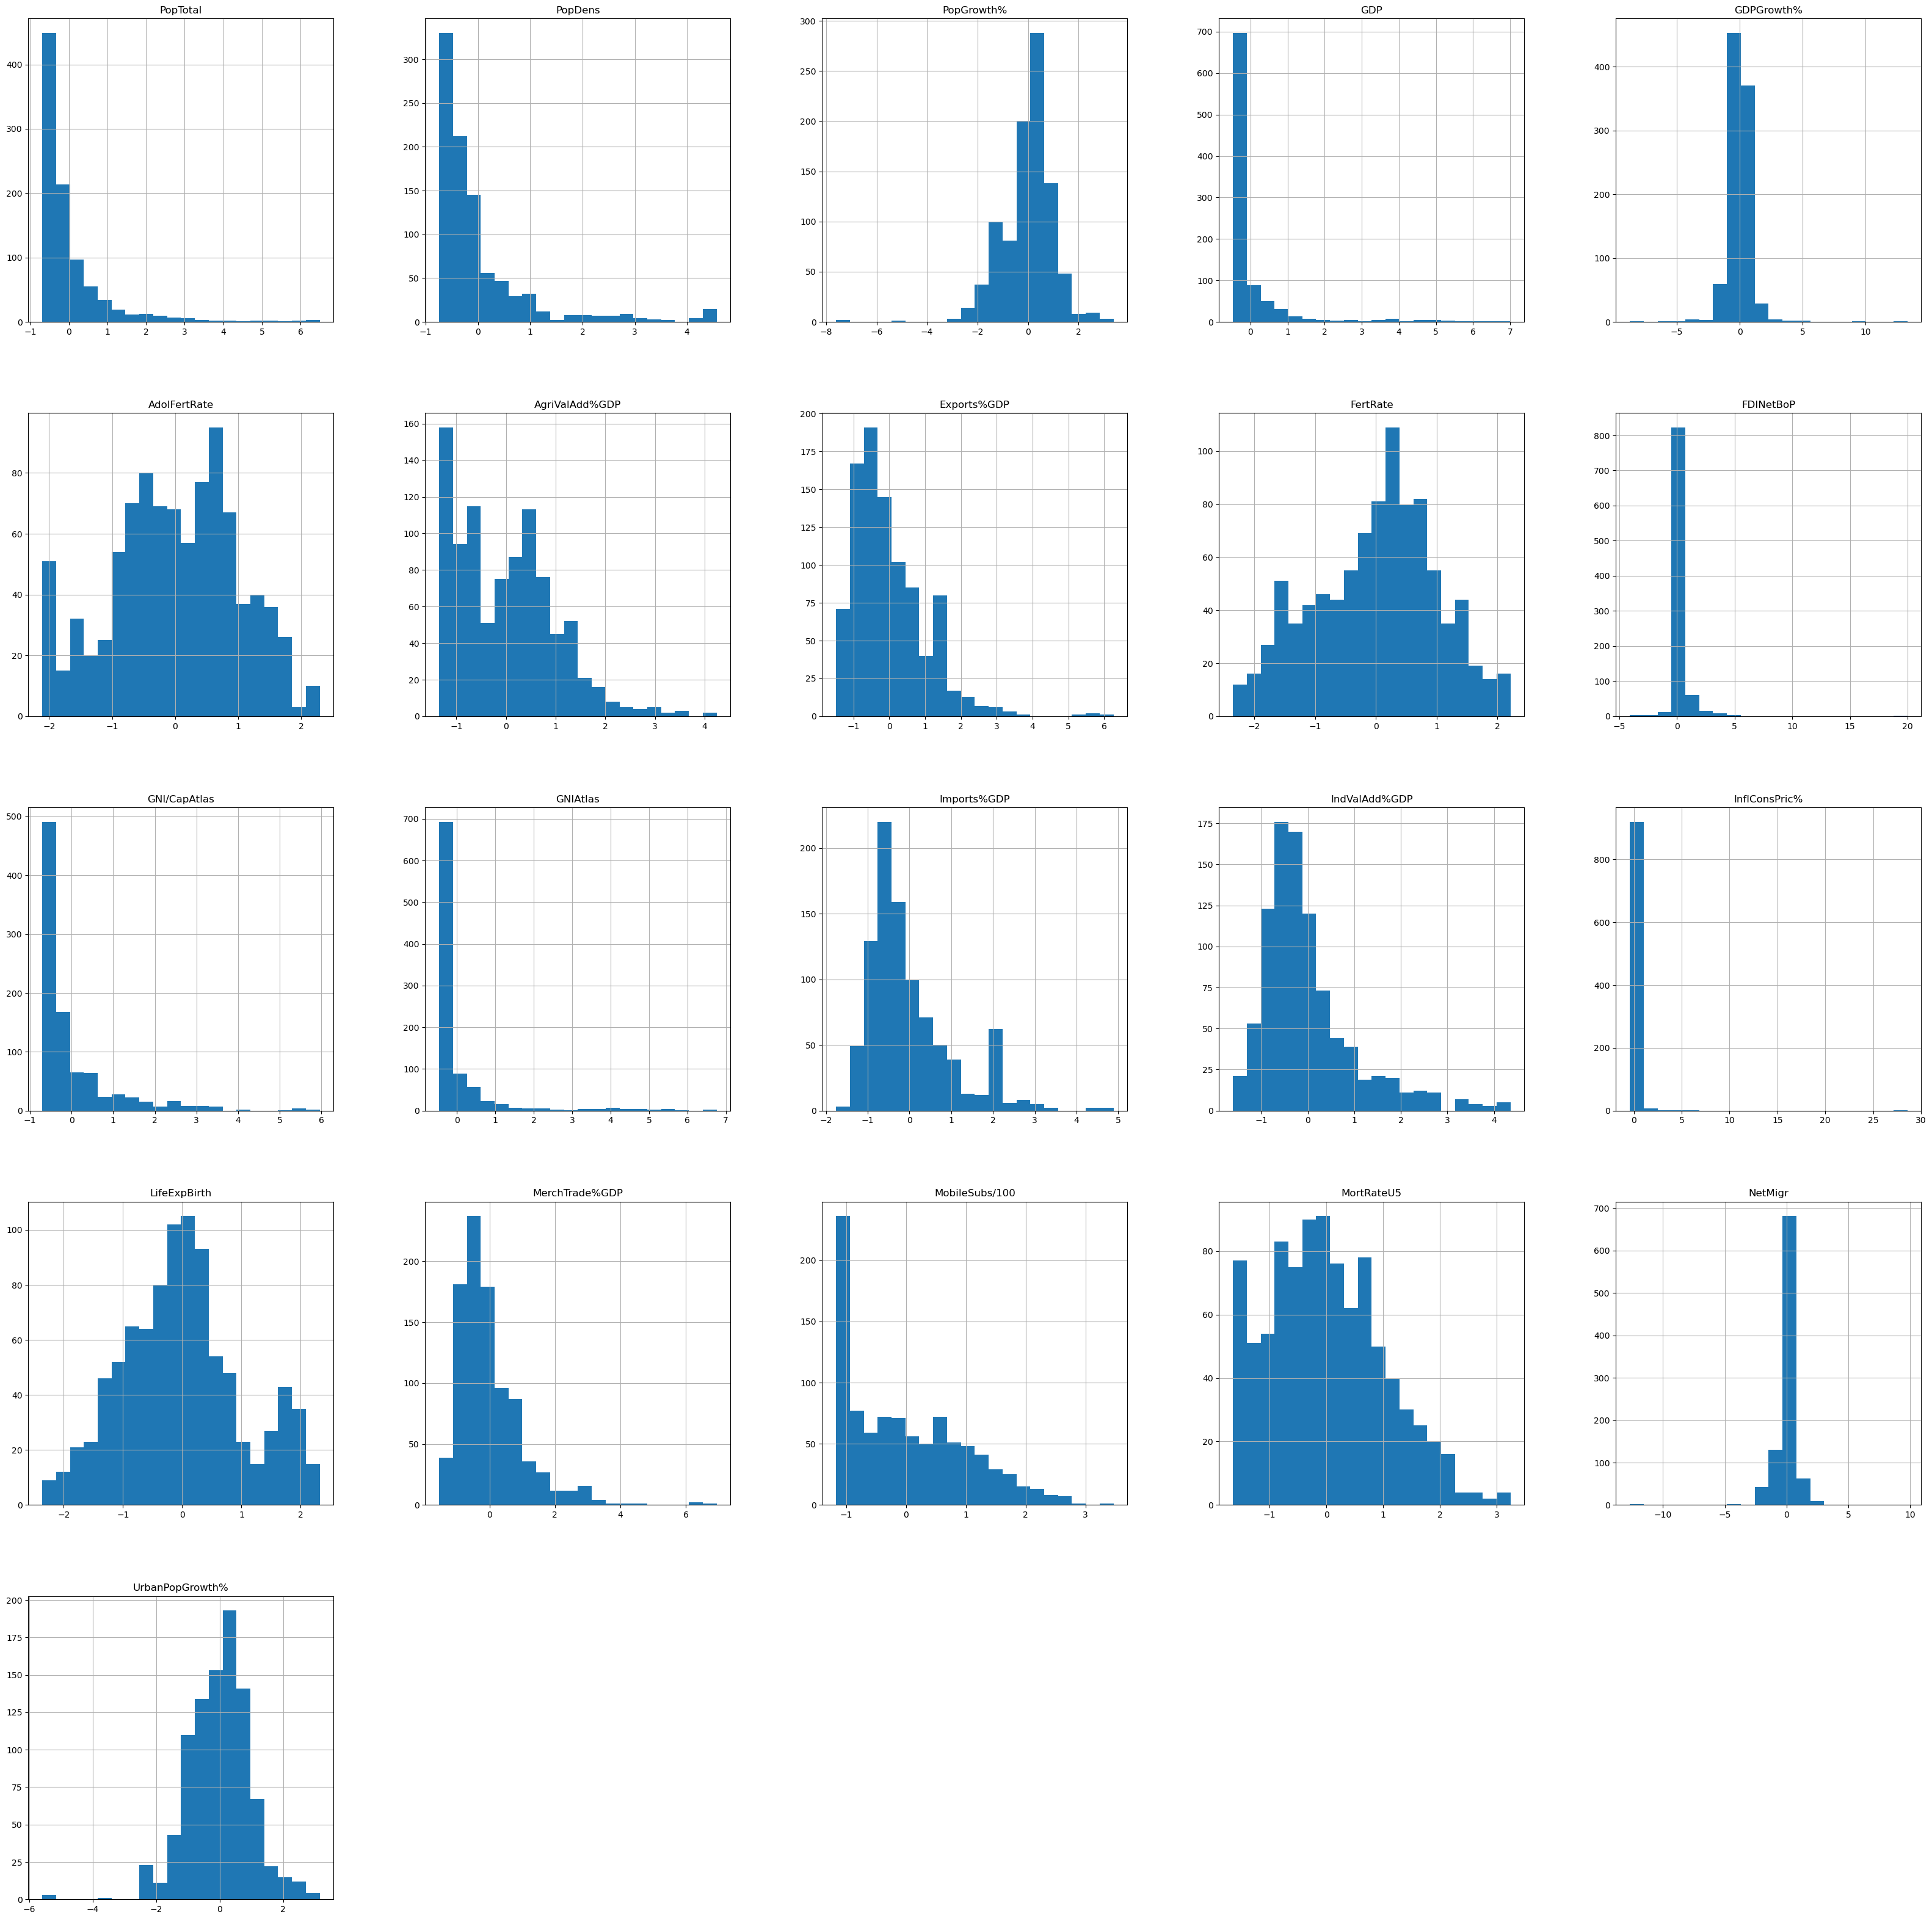

In [7]:
#Split data
train_set, test_set = train_test_split(africa_data, test_size=0.2, random_state=42)

scaler = StandardScaler()
train_set = pd.DataFrame(scaler.fit_transform(train_set), columns=train_set.columns)
test_set = pd.DataFrame(scaler.transform(test_set), columns=test_set.columns)

#Normalize the features
scalered_train_set=scaler.fit_transform(train_set)
scalered_test_set=scaler.transform(test_set)

#Visualize the normalized features
train_set.hist(bins=20,figsize=(40,40))
plt.savefig("Normalized_Features.png")
plt.show()

In [15]:
# Split data into features and target
X_train = train_set.drop(columns=['PopGrowth%'])
y_train = train_set['PopGrowth%']
X_test = test_set.drop(columns=['PopGrowth%'])
y_test = test_set['PopGrowth%']

In [16]:
# Define and evaluate models
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regression": SVR(),
    "XGBoost": XGBRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

for name, model in models.items():
    kFold = KFold(n_splits=10, shuffle=True, random_state=42)
    r2_scores = cross_val_score(model, X_train, y_train, cv=kFold, scoring='r2', error_score='raise')
    mse_scores = -cross_val_score(model, X_train, y_train, cv=kFold, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, X_train, y_train, cv=kFold, scoring='neg_mean_absolute_error')
    print(f"{name}:")
    print("Cross-validation R^2 scores:", r2_scores)
    print("Mean R^2:", np.mean(r2_scores))
    print("Cross-validation MSE scores:", mse_scores)
    print("Mean MSE:", np.mean(mse_scores))
    print("Cross_validation MAE scores:", mae_scores)
    print("Mean MAE:", np.mean(mae_scores))
    print("\n")

Linear Regression:
Cross-validation R^2 scores: [0.84801471 0.78385492 0.60766599 0.75523126 0.80897438 0.66280001
 0.81641716 0.6991808  0.73189541 0.83613847]
Mean R^2: 0.7550173116825744
Cross-validation MSE scores: [0.14343728 0.18801142 0.26377855 0.15246623 0.15657412 0.61120464
 0.16263053 0.28937181 0.45407866 0.10443329]
Mean MSE: 0.2525986530639127
Cross_validation MAE scores: [0.27608973 0.31042922 0.36686952 0.30986161 0.29882655 0.34031034
 0.28927247 0.32282482 0.42504418 0.23310451]
Mean MAE: 0.31726329438331297


Support Vector Regression:
Cross-validation R^2 scores: [0.9436146  0.89848519 0.90484892 0.8754609  0.91371884 0.56223798
 0.84136652 0.89400147 0.55515998 0.94482416]
Mean R^2: 0.8333718555835647
Cross-validation MSE scores: [0.05321415 0.08830154 0.06397308 0.07757529 0.07072034 0.79348217
 0.14052863 0.10196486 0.7534088  0.03516503]
Mean MSE: 0.21783338979079306
Cross_validation MAE scores: [0.15568468 0.18755937 0.15675056 0.17845713 0.1467684  0.27632456

In [17]:
#Tese set performance
performance_results = {}
for name, model in models.items():
    # Fit the model to the entire training set
    model.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = model.predict(X_test)
    
    # Calculate and print the R^2 score, MSE and MAE for the test set
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store the performance metrics
    performance_results[name] = {'R2 Score': r2, 'MSE': mse, 'MAE': mae}

# Sort the models based on R^2 score
sorted_models = sorted(performance_results.items(), key=lambda x: x[1]['R2 Score'], reverse=True)

print("Model Rankings based on R^2 Score:")
for idx, (model_name, metrics) in enumerate(sorted_models, start=1):
    print(f"{idx}. {model_name}: R^2 Score = {metrics['R2 Score']:.4f}, MSE = {metrics['MSE']:.4f}, MAE = {metrics['MAE']:.4f}")

Model Rankings based on R^2 Score:
1. XGBoost: R^2 Score = 0.9337, MSE = 0.0551, MAE = 0.1248
2. Random Forest Regressor: R^2 Score = 0.9114, MSE = 0.0736, MAE = 0.1421
3. Support Vector Regression: R^2 Score = 0.9094, MSE = 0.0753, MAE = 0.1655
4. Linear Regression: R^2 Score = 0.7983, MSE = 0.1675, MAE = 0.2922


Feature Importances:
            Feature  Importance
19  UrbanPopGrowth%    0.592322
7          FertRate    0.091646
18          NetMigr    0.080623
1           PopDens    0.051169
6       Exports%GDP    0.036864
10         GNIAtlas    0.026223
14     LifeExpBirth    0.022496
0          PopTotal    0.015850
4      AdolFertRate    0.015709
5    AgriValAdd%GDP    0.012546
11      Imports%GDP    0.011839
9      GNI/CapAtlas    0.011737
15   MerchTrade%GDP    0.006995
2               GDP    0.006743
12    IndValAdd%GDP    0.006058
16   MobileSubs/100    0.005585
8         FDINetBoP    0.002086
3        GDPGrowth%    0.001237
13    InflConsPric%    0.001175
17       MortRateU5    0.001095


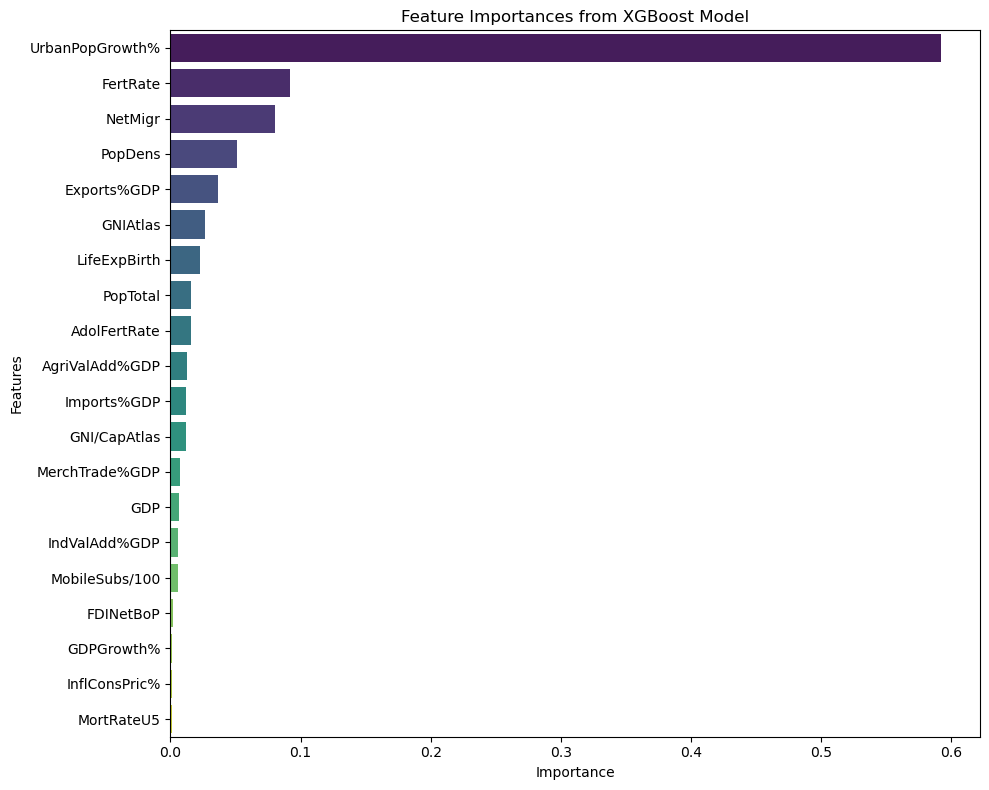

In [30]:
# Fit the model to the entire training set
best_model = models[sorted_models[0][0]]  # Select the best performing model
best_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame to hold feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features based on importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(importance_df)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title('Feature Importances from XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig("Feature Importances from XGBoost Model.png")
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV

# Initialize the XGBRegressor
xgb_model = XGBRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (MSE): ", -grid_search.best_score_)


Fitting 10 folds for each of 324 candidates, totalling 3240 fits
Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}
Best cross-validation score (MSE):  0.09012496218338342


In [29]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE: ", mse)
print("Test R^2 Score: ", r2)

Test MSE:  0.0575633993535681
Test R^2 Score:  0.9307073352589498


In [27]:
# Extract feature importancesi
feature_importances = best_model.feature_importances_

# Create a DataFrame to hold feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features based on importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(importance_df)

Feature Importances:
            Feature  Importance
19  UrbanPopGrowth%    0.389659
7          FertRate    0.216582
18          NetMigr    0.064902
4      AdolFertRate    0.056965
14     LifeExpBirth    0.034985
1           PopDens    0.034084
6       Exports%GDP    0.032048
0          PopTotal    0.029602
10         GNIAtlas    0.024128
15   MerchTrade%GDP    0.019620
11      Imports%GDP    0.018767
12    IndValAdd%GDP    0.014233
17       MortRateU5    0.011740
2               GDP    0.011669
5    AgriValAdd%GDP    0.010711
8         FDINetBoP    0.010582
9      GNI/CapAtlas    0.010126
16   MobileSubs/100    0.004231
13    InflConsPric%    0.003400
3        GDPGrowth%    0.001965
